In [58]:
import re
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [59]:
def read_simulation_output(filename):
    with open(filename, 'r') as f:
        lines = [l for l in f]
    return lines

In [60]:
result_dir = Path('Zero_MPI_comparison/4s-new')

In [61]:
lines_array = []
for file in result_dir.glob("*.out"):
    lines_array.append(read_simulation_output(file))

In [62]:
def get_means_and_threads(lines):
    threads = None
    stn_lfp1_means = []
    stn_lfp1_sums = []
    stn_lfp2_means = []
    stn_lfp2_sums = []
    syn_i_means = []
    syn_i_vars = []
    syn_i_sums = []
    electrode1_dist_means = []
    electrode1_dist_sums = []
    electrode2_dist_means = []
    electrode2_dist_sums = []
    
    for line in lines:
        if threads is None:
            threads = int(re.search('^numprocs=(\d+)$', line).groups()[0])
            
        mean1_regexp = re.search("_1 mean = ([0-9\.\-e]+)$", line)
        sum1_regexp = re.search("_1 sum = ([0-9\.\-e]+)$", line)
        mean2_regexp = re.search("_2 mean = ([0-9\.\-e]+)$", line)
        sum2_regexp = re.search("_2 sum = ([0-9\.\-e]+)$", line)
        stn_syn_i_mean_regexp = re.search("STN_Syn_i mean = ([0-9\.\-e]+)$", line)
        stn_syn_i_var_regexp = re.search("STN_Syn_i var = ([0-9\.\-e]+)$", line)
        stn_syn_i_sum_regexp = re.search("STN_Syn_i sum = ([0-9\.\-e]+)$", line)
        
        electrode_1_dist_sum_regexp = re.search("electrode_1_distances sum = ([0-9\.\-e]+)$", line)
        electrode_1_dist_mean_regexp = re.search("electrode_1_distances mean = ([0-9\.\-e]+)$", line)
        electrode_2_dist_sum_regexp = re.search("electrode_2_distances sum = ([0-9\.\-e]+)$", line)
        electrode_2_dist_mean_regexp = re.search("electrode_2_distances mean = ([0-9\.\-e]+)$", line)
        
        
        if mean1_regexp is not None:
            stn_lfp1_means.append(float(mean1_regexp.groups()[0]))
        if sum1_regexp is not None:
            stn_lfp1_sums.append(float(sum1_regexp.groups()[0]))
        if mean2_regexp is not None:
            stn_lfp2_means.append(float(mean2_regexp.groups()[0]))
        if sum2_regexp is not None:
            stn_lfp2_sums.append(float(sum2_regexp.groups()[0]))
        if stn_syn_i_mean_regexp is not None:
            syn_i_means.append(float(stn_syn_i_mean_regexp.groups()[0]))
        if stn_syn_i_var_regexp is not None:
            syn_i_vars.append(float(stn_syn_i_var_regexp.groups()[0]))
        if stn_syn_i_sum_regexp is not None:
            syn_i_sums.append(float(stn_syn_i_sum_regexp.groups()[0]))
        if electrode_1_dist_sum_regexp is not None:
            electrode1_dist_sums.append(float(electrode_1_dist_sum_regexp.groups()[0]))
        if electrode_1_dist_mean_regexp is not None:
            electrode1_dist_means.append(float(electrode_1_dist_mean_regexp.groups()[0]))
        if electrode_2_dist_sum_regexp is not None:
            electrode2_dist_sums.append(float(electrode_2_dist_sum_regexp.groups()[0]))
        if electrode_2_dist_mean_regexp is not None:
            electrode2_dist_means.append(float(electrode_2_dist_mean_regexp.groups()[0]))
        
    return (
        threads,
        stn_lfp1_means,
        stn_lfp2_means,
        stn_lfp1_sums,
        stn_lfp2_sums,
        syn_i_means,
        syn_i_vars,
        syn_i_sums,
        electrode1_dist_means,
        electrode1_dist_sums,
        electrode2_dist_means,
        electrode2_dist_sums,
        )

In [63]:
result_array = [get_means_and_threads(lines) for lines in lines_array]

In [64]:
def result_scatterplot(ax, result):
    ax[0].scatter(result[0] * np.ones(len(result[1])) + np.random.normal(0, 0.1, len(result[1])), result[1])
    ax[1].scatter(result[0] * np.ones(len(result[3])) + np.random.normal(0, 0.1, len(result[3])), result[3])
    ax[2].scatter(result[0] * np.ones(len(result[2])) + np.random.normal(0, 0.1, len(result[2])), result[2])
    ax[3].scatter(result[0] * np.ones(len(result[4])) + np.random.normal(0, 0.1, len(result[4])), result[4])

In [65]:
for r in result_array:
    print(f"{r[0]}: {len(r[1])}")

16: 0
12: 0
18: 0
14: 0


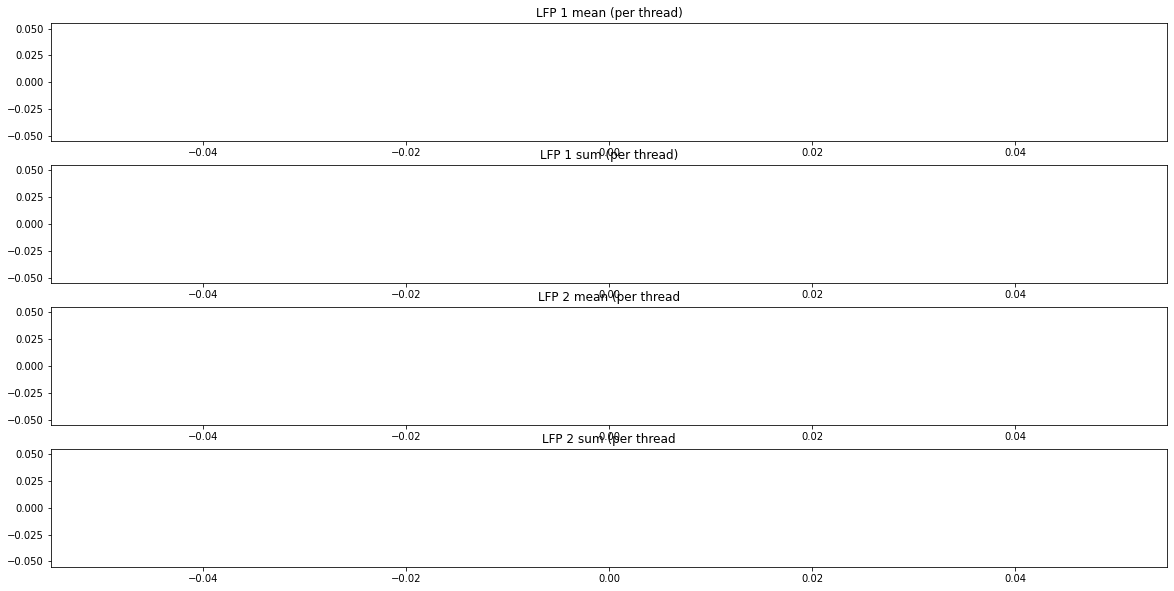

In [66]:
fig, axs = plt.subplots(4, 1, figsize=(20, 10))

axs[0].set_title('LFP 1 mean (per thread)')
axs[1].set_title('LFP 1 sum (per thread)')

axs[2].set_title('LFP 2 mean (per thread')
axs[3].set_title('LFP 2 sum (per thread')

for r in result_array:
    result_scatterplot(axs, r)

In [67]:
def result_synaptic_current_scatterplot(ax, result):
    ax[0].scatter(result[0] * np.ones(len(result[5])) + np.random.normal(0, 0.1, len(result[5])), result[5])
    ax[1].scatter(result[0] * np.ones(len(result[6])) + np.random.normal(0, 0.1, len(result[6])), result[6])
    ax[2].scatter(result[0] * np.ones(len(result[7])) + np.random.normal(0, 0.1, len(result[7])), result[7])
    if len(result[7]) > 0:
        ax[3].scatter(result[0] * np.ones(len(result[7])) + np.random.normal(0, 0.1, len(result[7])),  [e * result[0] for e in result[7]])

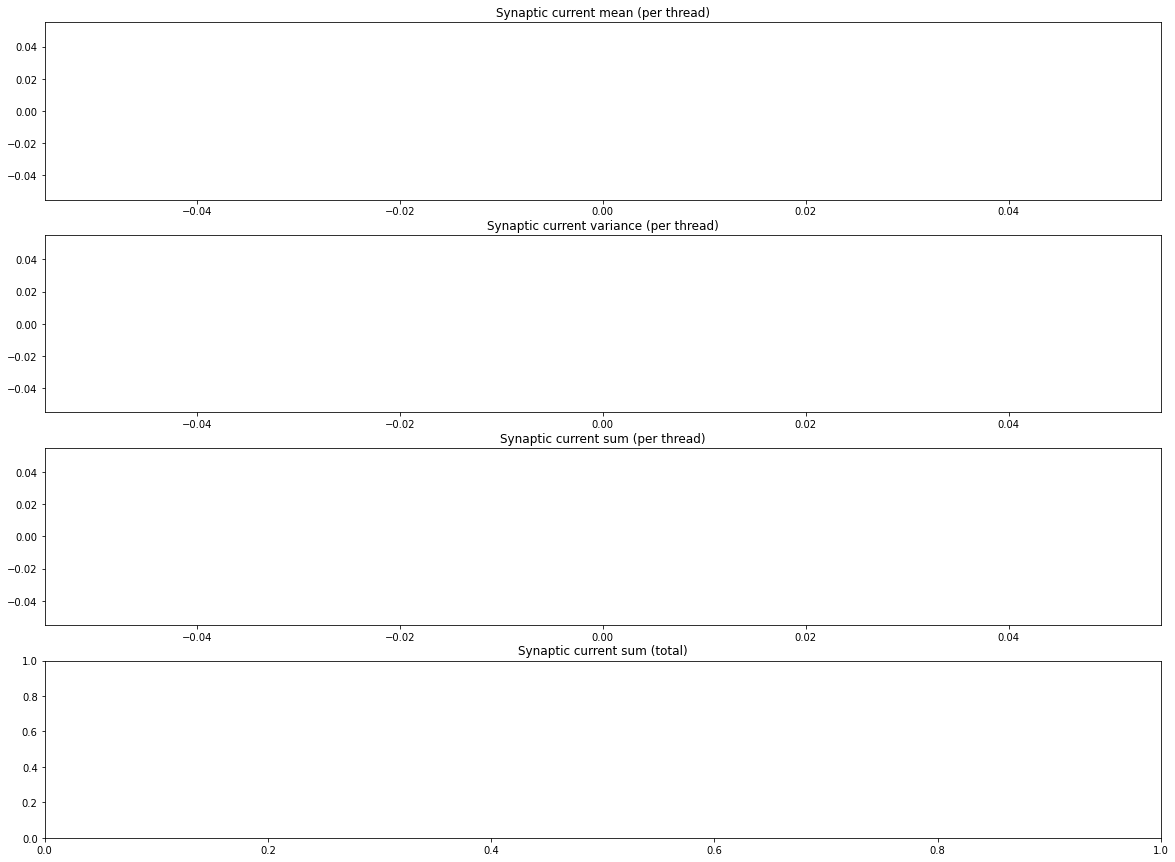

In [68]:
fig, axs = plt.subplots(4, 1, figsize=(20, 15), facecolor='white')

axs[0].set_title('Synaptic current mean (per thread)')
axs[1].set_title('Synaptic current variance (per thread)')
axs[2].set_title('Synaptic current sum (per thread)')
axs[3].set_title('Synaptic current sum (total)')

for r in result_array:
    result_synaptic_current_scatterplot(axs, r)

In [69]:
def result_synaptic_current_scatterplot(ax, result):
    ax[0].scatter(result[0] * np.ones(len(result[8])) + np.random.normal(0, 0.1, len(result[8])), result[8])
    ax[1].scatter(result[0] * np.ones(len(result[9])) + np.random.normal(0, 0.1, len(result[9])), result[9])
    ax[2].scatter(result[0] * np.ones(len(result[10])) + np.random.normal(0, 0.1, len(result[10])), result[10])
    ax[3].scatter(result[0] * np.ones(len(result[11])) + np.random.normal(0, 0.1, len(result[11])),  result[11])

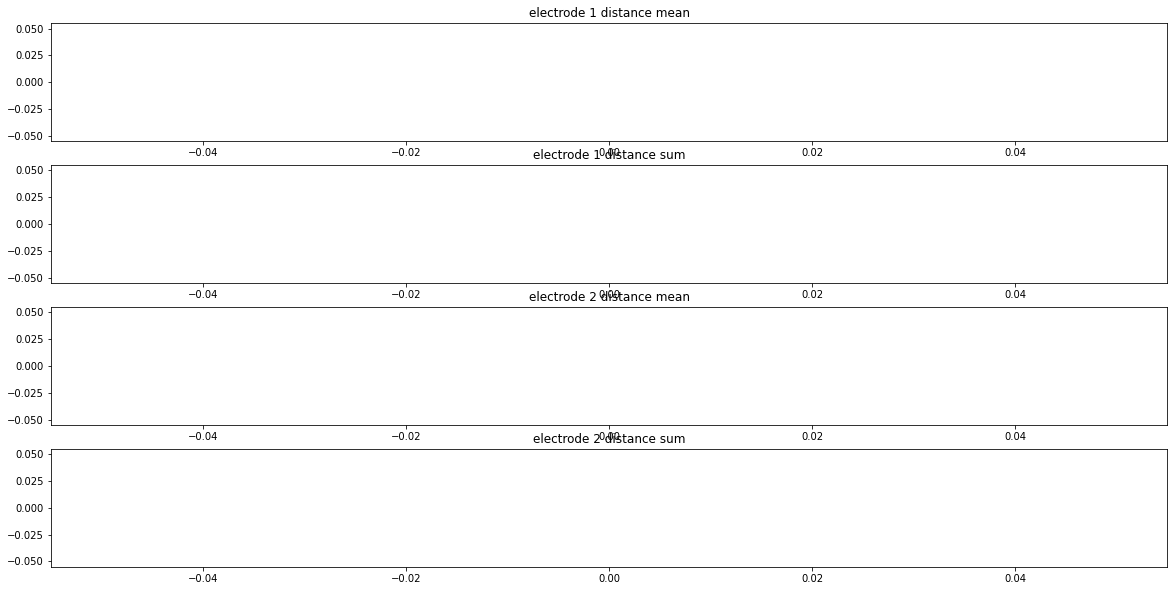

In [70]:
fig, axs = plt.subplots(4, 1, figsize=(20, 10))

axs[0].set_title('electrode 1 distance mean')
axs[1].set_title('electrode 1 distance sum')
axs[2].set_title('electrode 2 distance mean')
axs[3].set_title('electrode 2 distance sum')

for r in result_array:
    result_synaptic_current_scatterplot(axs, r)